In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import env
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
url = env.get_database('mall_customers')
query = '''
select *
from customers;'''

In [3]:
df = pd.read_sql(query, url)

In [4]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

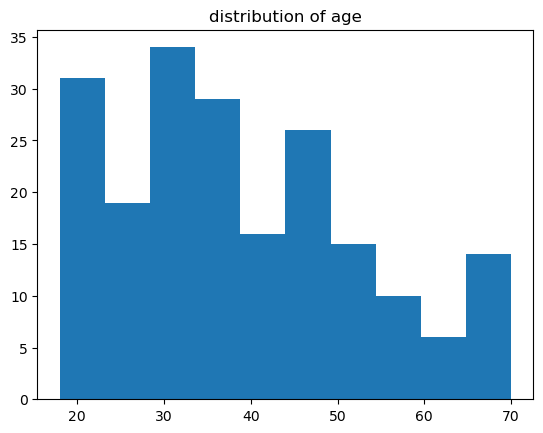

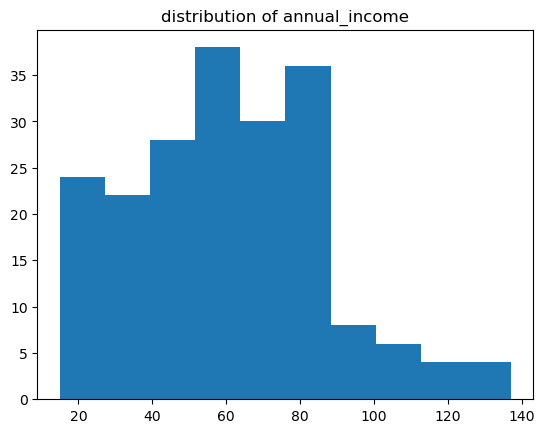

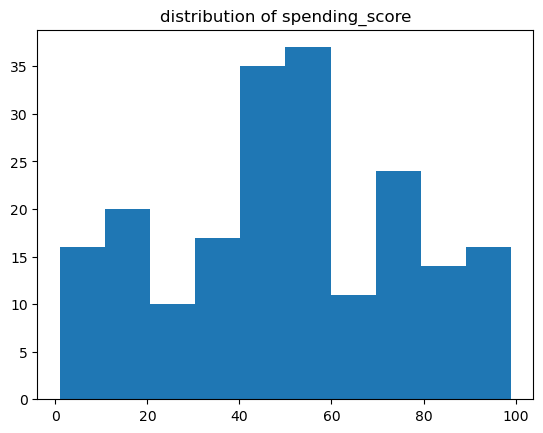

In [5]:
num_cols = ['age', 'annual_income', 'spending_score']

for col in num_cols:
    
    plt.hist(df[col])
    plt.title(f'distribution of {col}')
    plt.show()

## Detect outliers using IQR

In [6]:
q1, q3 = df.spending_score.quantile([0.25, 0.75])
q1 ,q3

(34.75, 73.0)

In [7]:
ss_iqr = q3 - q1
ss_iqr

38.25

In [8]:
k = 1.5

ss_upper = q3 + k * ss_iqr
ss_lower = q1 - k * ss_iqr

ss_lower, ss_upper


(-22.625, 130.375)

In [9]:
np.where(df.spending_score > ss_upper, 1, 0) # 1, 0 are the values for if True, if False

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [10]:
def upper_outlier_detector(dataframe, column, k = 1.5):
    q1, q3 = dataframe[column].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + k * iqr
    
    return np.where(dataframe[column] > upper_bound, 1, 0)

In [11]:
my_list = ['age', 'annual_income']

for col in my_list:
    
    df[f'{col}_upper_outliers'] = upper_outlier_detector(df, col)
    
df.head()

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0


In [12]:
df[['age_upper_outliers', 'annual_income_upper_outliers']].sum()

age_upper_outliers              0
annual_income_upper_outliers    2
dtype: int64

In [13]:
df[df['annual_income_upper_outliers'] == 1]

,customer_id,gender,age,annual_income,spending_score,age_upper_outliers,annual_income_upper_outliers
198,199,Male,32,137,18,0,1
199,200,Male,30,137,83,0,1


In [14]:
df['annual_income'].mean()

60.56

# Start of Exercises

In [15]:
url = env.get_database('zillow')

query = '''
select *, airconditioningdesc, architecturalstyledesc, buildingclassdesc, heatingorsystemdesc, logerror, transactiondate, propertylandusedesc, storydesc, typeconstructiondesc
from properties_2017
left join airconditioningtype using(airconditioningtypeid)
left join heatingorsystemtype using(heatingorsystemtypeid)
left join architecturalstyletype using(architecturalstyletypeid)
left join buildingclasstype using(buildingclasstypeid)
join predictions_2017 using(parcelid)
left join propertylandusetype using(propertylandusetypeid)
left join storytype using(storytypeid)
left join typeconstructiontype using(typeconstructiontypeid)
where propertylandusedesc = 'Single Family Residential';'''

In [16]:
zillow = pd.read_sql(query, url)



In [17]:
zillow

,typeconstructiontypeid,storytypeid,propertylandusetypeid,parcelid,buildingclasstypeid,architecturalstyletypeid,heatingorsystemtypeid,airconditioningtypeid,id,basementsqft,...,typeconstructiondesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,14297519,None,NaN,NaN,NaN,1727539,NaN,...,None,None,None,None,None,0.025595,2017-01-01,Single Family Residential,None,None
1,NaN,NaN,261.0,17052889,None,NaN,NaN,NaN,1387261,NaN,...,None,None,None,None,None,0.055619,2017-01-01,Single Family Residential,None,None
2,NaN,NaN,261.0,14186244,None,NaN,NaN,NaN,11677,NaN,...,None,None,None,None,None,0.005383,2017-01-01,Single Family Residential,None,None
3,NaN,NaN,261.0,12177905,None,NaN,2.0,NaN,2288172,NaN,...,None,None,None,None,Central,-0.103410,2017-01-01,Single Family Residential,None,None
4,NaN,NaN,261.0,12095076,None,NaN,2.0,1.0,781532,NaN,...,None,Central,None,None,Central,-0.001011,2017-01-01,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,NaN,NaN,261.0,11000655,None,NaN,2.0,NaN,673515,NaN,...,None,None,None,None,Central,0.020615,2017-09-20,Single Family Residential,None,None
52438,NaN,NaN,261.0,17239384,None,NaN,NaN,NaN,2968375,NaN,...,None,None,None,None,None,0.013209,2017-09-21,Single Family Residential,None,None
52439,NaN,NaN,261.0,12773139,None,NaN,2.0,1.0,1843709,NaN,...,None,Central,None,None,Central,0.037129,2017-09-21,Single Family Residential,None,None
52440,NaN,NaN,261.0,12826780,None,NaN,2.0,NaN,1187175,NaN,...,None,None,None,None,Central,0.007204,2017-09-25,Single Family Residential,None,None


In [18]:
def nulvals(df):
    loop = list(range(0,len(df.axes[1])))
    adf = []
    for i in loop:
        x = df.iloc[:, i].isna().sum()
        adf.append(x)
    cols = df.columns.values
    fjf = []
    for i in adf:
        x = i / len(df.axes[0])
        fjf.append(x)
    alltogether = pd.DataFrame({'column_name': cols, 'number_of_nulls': adf, 'percent_null': fjf})
    alltogether = alltogether.set_index('column_name')
    return alltogether

# Function that takes in dataframe and returns dataframe with column names, number of nulls in each column,
# and the percentage of rows that are null

In [19]:
nullz = nulvals(zillow)

In [20]:
nullz

,number_of_nulls,percent_null
column_name,,
typeconstructiontypeid,52366,0.998551
storytypeid,52395,0.999104
propertylandusetypeid,0,0.000000
parcelid,0,0.000000
buildingclasstypeid,52442,1.000000
...,...,...
logerror,0,0.000000
transactiondate,0,0.000000
propertylandusedesc,0,0.000000


In [21]:
zillow.describe() # summary of data

,typeconstructiontypeid,storytypeid,propertylandusetypeid,parcelid,architecturalstyletypeid,heatingorsystemtypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,logerror,logerror
count,76.000000,47.0,52442.0,5.244200e+04,70.00000,33936.000000,13638.000000,5.244200e+04,47.000000,52442.000000,...,5.235800e+04,5.244100e+04,52442.0,5.244100e+04,52438.000000,2079.000000,5.231900e+04,52442.000000,52442.000000,52442.000000
mean,5.973684,7.0,261.0,1.299912e+07,7.10000,3.966378,2.438041,1.497288e+06,678.978723,2.299397,...,1.965315e+05,5.296830e+05,2016.0,3.334626e+05,6453.451945,14.102453,6.050240e+13,38860.631917,0.018294,0.018294
std,0.229416,0.0,0.0,3.411412e+06,2.66567,2.562521,3.846176,8.594413e+05,711.825226,1.022764,...,2.543382e+05,7.518883e+05,0.0,5.705227e+05,8755.495483,2.394972,1.859019e+12,22348.437271,0.177502,0.177502
min,4.000000,7.0,261.0,1.071186e+07,2.00000,1.000000,1.000000,3.490000e+02,38.000000,0.000000,...,1.290000e+02,1.000000e+03,2016.0,1.610000e+02,49.180000,4.000000,6.037101e+13,0.000000,-4.655420,-4.655420
25%,6.000000,7.0,261.0,1.151030e+07,7.00000,2.000000,1.000000,7.579560e+05,263.500000,2.000000,...,7.707175e+04,1.937500e+05,2016.0,7.602600e+04,2656.250000,14.000000,6.037401e+13,19546.250000,-0.024639,-0.024639
50%,6.000000,7.0,261.0,1.257766e+07,7.00000,2.000000,1.000000,1.500836e+06,512.000000,2.000000,...,1.318070e+05,3.736120e+05,2016.0,2.180250e+05,4647.730000,15.000000,6.037620e+13,38927.500000,0.007010,0.007010
75%,6.000000,7.0,261.0,1.412951e+07,7.00000,7.000000,1.000000,2.241564e+06,809.500000,3.000000,...,2.263198e+05,6.193010e+05,2016.0,4.086000e+05,7377.445000,15.000000,6.059042e+13,58093.500000,0.040691,0.040691
max,6.000000,7.0,261.0,1.676878e+08,21.00000,24.000000,13.000000,2.982270e+06,3560.000000,18.000000,...,9.164901e+06,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.000000,5.262999,5.262999


In [22]:
def drops(df, thresh1, thresh2):
    loop = list(range(0,len(df.axes[1])))
    adf = []
    for i in loop:
        x = df.iloc[:, i].isna().sum()
        adf.append(x)
    fjf = []
    for i in adf:
        x = i / len(df.axes[0])
        fjf.append(x)
    indices = np.array(fjf)
    indices2 = np.where(indices > thresh1)[0]
    df = df.drop(df.columns[indices2], axis = 1)
    
    ddd = []
    x = df.isnull().sum(axis = 1)
    for i in x:
        you = i / len(x)
        ddd.append(you)
    indices3 = np.array(ddd)
    indices4 = np.where(indices3 > thresh2)[0]
    df = df.drop(indices4)
    return df
# function that takes removes all columns that have more that 60% nulls and then rows that have
# more than 75% nulls

In [23]:
df1 = drops(zillow, 0.6, 0.5)

In [24]:
df1

,propertylandusetypeid,parcelid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,censustractandblock,heatingorsystemdesc,id,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc,logerror,transactiondate,propertylandusedesc
0,261.0,14297519,NaN,1727539,3.5,4.0,NaN,3.5,3100.0,3100.0,...,6.059063e+13,None,0,0.025595,2017-01-01,Single Family Residential,None,0.025595,2017-01-01,Single Family Residential
1,261.0,17052889,NaN,1387261,1.0,2.0,NaN,1.0,1465.0,1465.0,...,6.111001e+13,None,1,0.055619,2017-01-01,Single Family Residential,None,0.055619,2017-01-01,Single Family Residential
2,261.0,14186244,NaN,11677,2.0,3.0,NaN,2.0,1243.0,1243.0,...,6.059022e+13,None,2,0.005383,2017-01-01,Single Family Residential,None,0.005383,2017-01-01,Single Family Residential
3,261.0,12177905,2.0,2288172,3.0,4.0,8.0,3.0,2376.0,2376.0,...,6.037300e+13,Central,3,-0.103410,2017-01-01,Single Family Residential,Central,-0.103410,2017-01-01,Single Family Residential
4,261.0,12095076,2.0,781532,3.0,4.0,9.0,3.0,2962.0,2962.0,...,6.037461e+13,Central,6,-0.001011,2017-01-01,Single Family Residential,Central,-0.001011,2017-01-01,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,261.0,11000655,2.0,673515,2.0,2.0,6.0,2.0,1286.0,1286.0,...,6.037101e+13,Central,77609,0.020615,2017-09-20,Single Family Residential,Central,0.020615,2017-09-20,Single Family Residential
52438,261.0,17239384,NaN,2968375,2.0,4.0,NaN,2.0,1612.0,1612.0,...,6.111008e+13,None,77610,0.013209,2017-09-21,Single Family Residential,None,0.013209,2017-09-21,Single Family Residential
52439,261.0,12773139,2.0,1843709,1.0,3.0,4.0,1.0,1032.0,1032.0,...,6.037434e+13,Central,77611,0.037129,2017-09-21,Single Family Residential,Central,0.037129,2017-09-21,Single Family Residential
52440,261.0,12826780,2.0,1187175,2.0,3.0,6.0,2.0,1762.0,1762.0,...,6.037503e+13,Central,77612,0.007204,2017-09-25,Single Family Residential,Central,0.007204,2017-09-25,Single Family Residential


In [25]:
df1.describe()

,propertylandusetypeid,parcelid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,logerror
count,52442.0,5.244200e+04,33936.000000,5.244200e+04,52442.000000,52442.000000,33741.000000,52305.000000,52360.000000,52195.000000,...,52326.000000,5.235800e+04,5.244100e+04,52442.0,5.244100e+04,52438.000000,5.231900e+04,52442.000000,52442.000000,52442.000000
mean,261.0,1.299912e+07,3.966378,1.497288e+06,2.299397,3.300675,6.264100,2.304732,1922.874083,1925.029390,...,1963.393820,1.965315e+05,5.296830e+05,2016.0,3.334626e+05,6453.451945,6.050240e+13,38860.631917,0.018294,0.018294
std,0.0,3.411412e+06,2.562521,8.594413e+05,1.022764,0.949086,1.716181,1.017958,1004.363491,1004.272877,...,23.133355,2.543382e+05,7.518883e+05,0.0,5.705227e+05,8755.495483,1.859019e+12,22348.437271,0.177502,0.177502
min,261.0,1.071186e+07,1.000000,3.490000e+02,0.000000,0.000000,1.000000,1.000000,128.000000,128.000000,...,1878.000000,1.290000e+02,1.000000e+03,2016.0,1.610000e+02,49.180000,6.037101e+13,0.000000,-4.655420,-4.655420
25%,261.0,1.151030e+07,2.000000,7.579560e+05,2.000000,3.000000,5.000000,2.000000,1268.000000,1270.000000,...,1950.000000,7.707175e+04,1.937500e+05,2016.0,7.602600e+04,2656.250000,6.037401e+13,19546.250000,-0.024639,-0.024639
50%,261.0,1.257766e+07,2.000000,1.500836e+06,2.000000,3.000000,6.000000,2.000000,1659.000000,1660.000000,...,1961.000000,1.318070e+05,3.736120e+05,2016.0,2.180250e+05,4647.730000,6.037620e+13,38927.500000,0.007010,0.007010
75%,261.0,1.412951e+07,7.000000,2.241564e+06,3.000000,4.000000,8.000000,3.000000,2306.000000,2308.000000,...,1979.000000,2.263198e+05,6.193010e+05,2016.0,4.086000e+05,7377.445000,6.059042e+13,58093.500000,0.040691,0.040691
max,261.0,1.676878e+08,24.000000,2.982270e+06,18.000000,14.000000,12.000000,18.000000,21929.000000,21929.000000,...,2016.000000,9.164901e+06,4.906124e+07,2016.0,4.895220e+07,586639.300000,4.830301e+14,77613.000000,5.262999,5.262999


#  Mall Exercises

In [26]:
mall_query = '''
select * from customers'''

In [27]:
mall_url = env.get_database('mall_customers')

In [28]:
mall_df = pd.read_sql(mall_query, mall_url)
mall_df.head()


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2. Summarize data

In [29]:
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [30]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


customer_id


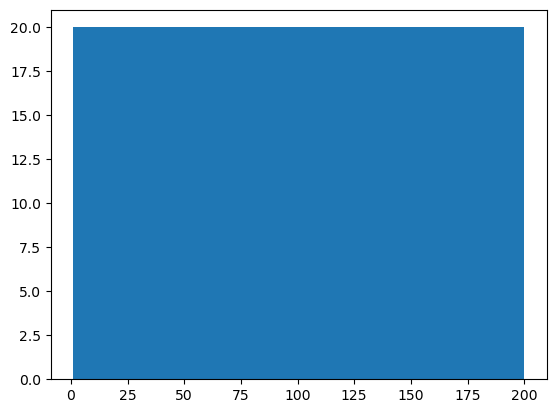

gender


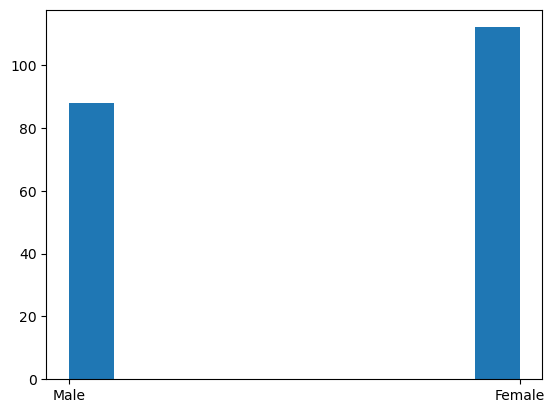

age


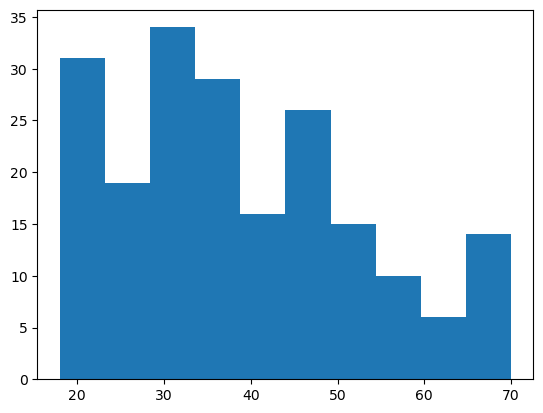

annual_income


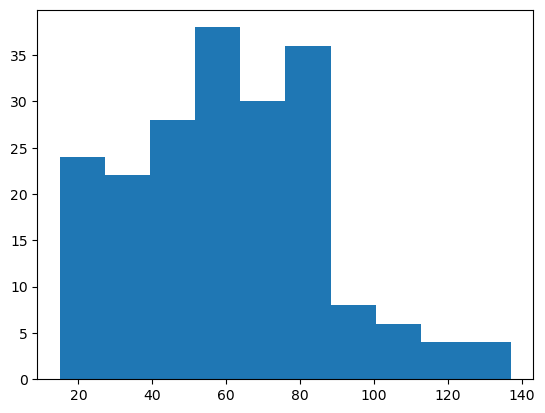

spending_score


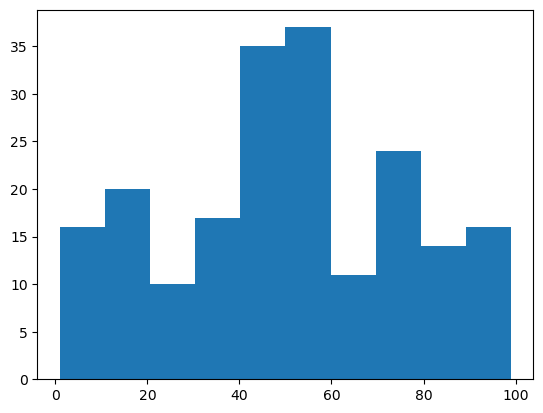

In [31]:
cols = mall_df.columns.to_list()

for col in cols:
    plt.hist(mall_df[col])
    print(f'{col}')
    plt.show()

# 3 detect outliers usering IQR

In [32]:
mall_df['age'].quantile([0.25, 0.75])
#let's find our quantiles for age

0.25    28.75
0.75    49.00
Name: age, dtype: float64

In [33]:
#another way to do this, numpy percentile 
q1, q3 = np.percentile(mall_df['age'], [25, 75])
q1, q3

(28.75, 49.0)

In [34]:
#another way to do this,
q1, q3 = np.quantile(mall_df['age'], [0.25, 0.75])
q1, q3

(28.75, 49.0)

In [35]:
#create a function to calculate outliers
def outlier_bound_calculation(df, variable):
    '''
    This function calcualtes the lower and upper bound 
    to locate outliers in the variable named
    '''
    quartile1, quartile3 = np.percentile(df[variable], [25,75])
    IQR_value = quartile3 - quartile1
    lower_bound = quartile1 - (1.5 * IQR_value)
    upper_bound = quartile3 + (1.5 * IQR_value)
    '''
    returns the lowerbound and upperbound values
    '''
    return print(f'For {variable} the lower bound is {lower_bound} and  upper bound is {upper_bound}')


In [36]:
age_outliers = outlier_bound_calculation(mall_df, 'age')


For age the lower bound is -1.625 and  upper bound is 79.375


In [37]:
#identify numeric columns only
num_df = mall_df.select_dtypes(exclude=object)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     200 non-null    int64
 1   age             200 non-null    int64
 2   annual_income   200 non-null    int64
 3   spending_score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [38]:
##identify discrete columns only
disc_df = mall_df.select_dtypes(include=object)
disc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [39]:

#let's iterate through the list of numeric columns 
##to find the upper and lower bounds
cols = num_df.columns.to_list()    

for col in cols:
    outlier_bound_calculation(num_df, [col])


For ['customer_id'] the lower bound is -98.5 and  upper bound is 299.5
For ['age'] the lower bound is -1.625 and  upper bound is 79.375
For ['annual_income'] the lower bound is -13.25 and  upper bound is 132.75
For ['spending_score'] the lower bound is -22.625 and  upper bound is 130.375


# Split data into train, validate, and test

In [40]:
#function from wrangle.py
def split_data(df, target):
    '''
    This function take in a dataframe performs a train, validate, test split
    Returns train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test
    and prints out the shape of train, validate, test
    '''
    #create train_validate and test datasets
    train, test = train_test_split(df, train_size = 0.8, random_state = 123)
    #create train and validate datasets
    train, validate = train_test_split(train, train_size = 0.7, random_state = 123)

    #Split into X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]

    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
   
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [41]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_data(mall_df, 'spending_score')


train -> (112, 5)
validate -> (48, 5)
test -> (40, 5)


In [42]:
#Check get_dummies works as expected on my training data
dummy_df = pd.get_dummies(train)
dummy_df

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
123,124,39,69,91,0,1
76,77,45,54,53,1,0
171,172,28,87,75,0,1
10,11,67,19,14,0,1
35,36,21,33,81,1,0
...,...,...,...,...,...,...
175,176,30,88,86,1,0
101,102,49,62,48,1,0
148,149,34,78,22,1,0
99,100,20,61,49,0,1


In [43]:
def encoding(df, cols, drop_first=True):
    '''
    Take in df and list of columns
    add encoded columns derived from columns in list to the df
    '''
    for col in cols:

        dummies = pd.get_dummies(df[f'{col}'], drop_first=drop_first) # get dummy columns

        df = pd.concat([df, dummies], axis=1) # add dummy columns to df
        
    return df

In [44]:
train_encoded = encoding(train, disc_df , drop_first=True)


In [45]:
train_encoded


,customer_id,gender,age,annual_income,spending_score,Male
123,124,Male,39,69,91,1
76,77,Female,45,54,53,0
171,172,Male,28,87,75,1
10,11,Male,67,19,14,1
35,36,Female,21,33,81,0
...,...,...,...,...,...,...
175,176,Female,30,88,86,0
101,102,Female,49,62,48,0
148,149,Female,34,78,22,0
99,100,Male,20,61,49,1


# handle missing values

In [46]:
mall_df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [49]:
#Create the function
def null_counter(df):
    '''
    This function takes in a dataframe
    then calculate number and percent of values missing from each column
    and returns a dataframe with that information
    '''
    #name our columns
    new_columns = ['name', 'num_rows_missing', 'pct_rows_missing']
    
    #turn those columns into a dataframe
    new_df = pd.DataFrame(columns=new_columns)
    
    #create the for loop
    for col in list(df.columns):
        #that gets a sum of nulls in each column
        num_missing = df[col].isna().sum()
        #and the percentage of those missing values
        pct_missing = num_missing / df.shape[0]
        
        #create the dataframe with our info
        add_df = pd.DataFrame([{'name': col, 'num_rows_missing': num_missing,
                               'pct_rows_missing': pct_missing}])
        
        #and combine that with our initial dataframe
        new_df = pd.concat([new_df, add_df], axis=0)
    
    #set the index on name
    new_df.set_index('name', inplace=True)
    
    return new_df

In [50]:
#use null value counter function
null_malldf = null_counter(mall_df)

#take a look
null_malldf.sort_values(by='pct_rows_missing', ascending=False)

,num_rows_missing,pct_rows_missing
name,,
customer_id,0,0.0
gender,0,0.0
age,0,0.0
annual_income,0,0.0
spending_score,0,0.0


# scaling

In [51]:
train_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 123 to 22
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     112 non-null    int64 
 1   gender          112 non-null    object
 2   age             112 non-null    int64 
 3   annual_income   112 non-null    int64 
 4   spending_score  112 non-null    int64 
 5   Male            112 non-null    uint8 
dtypes: int64(4), object(1), uint8(1)
memory usage: 5.4+ KB


In [52]:
#create the scaler
mms = MinMaxScaler()

#fit the scaler on the desired columns
train_encoded[['age', 'annual_income']] = mms.fit_transform(train_encoded[['age','annual_income']])

#take a look
train_encoded.head()

NameError: name 'MinMaxScaler' is not defined